## requiremnts

In [ ]:
!wget "https://raw.githubusercontent.com/Braesemann/FounderPersonalities/refs/heads/main/Data/Fig1AB_df.csv" #download data

--2025-01-29 11:11:07--  https://raw.githubusercontent.com/Braesemann/FounderPersonalities/refs/heads/main/Data/Fig1AB_df.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4108180 (3.9M) [text/plain]
Saving to: ‘Fig1AB_df.csv’

Fig1AB_df.csv       100%[===================>]   3.92M  --.-KB/s    in 0.08s   

2025-01-29 11:11:08 (49.4 MB/s) - ‘Fig1AB_df.csv’ saved [4108180/4108180]



In [ ]:
#import libraries
import pandas as pd

import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, learning_curve

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from keras.losses import BinaryCrossentropy
from keras.metrics import F1Score, Accuracy
from tensorflow.keras.regularizers import l2

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
#creat a dataframe
data = pd.read_csv('Fig1AB_df.csv')
data = data.set_index('User')

## EDA

In [ ]:
data.shape

(11085, 32)

In [ ]:
data.head()

,Unnamed: 0,Openness_facet_adventurousness_percentile,Openness_facet_artistic_interests_percentile,Openness_facet_emotionality_percentile,Openness_facet_imagination_percentile,Openness_facet_intellect_percentile,Openness_facet_liberalism_percentile,Conscientiousness_facet_achievement_striving_percentile,Conscientiousness_facet_cautiousness_percentile,Conscientiousness_facet_dutifulness_percentile,...,Agreeableness_facet_morality_percentile,Agreeableness_facet_sympathy_percentile,Agreeableness_facet_trust_percentile,Emotional range_facet_anger_percentile,Emotional range_facet_anxiety_percentile,Emotional range_facet_depression_percentile,Emotional range_facet_immoderation_percentile,Emotional range_facet_self_consciousness_percentile,Emotional range_facet_vulnerability_percentile,Target
User,,,,,,,,,,,,,,,,,,,,,
1,1,0.906140,0.698060,0.569235,0.875790,0.936484,0.729900,0.415888,0.316836,0.250709,...,0.482995,0.872486,0.636709,0.360420,0.260906,0.408952,0.234259,0.285824,0.243598,Employee
2,2,0.975341,0.304232,0.031167,0.646798,0.670588,0.492373,0.826345,0.586042,0.543949,...,0.248585,0.128692,0.874493,0.227758,0.288962,0.393772,0.009883,0.706810,0.218314,Entrepreneur
3,3,0.862167,0.281244,0.435289,0.545796,0.327986,0.647502,0.897138,0.449071,0.579174,...,0.472421,0.495349,0.967112,0.534780,0.338165,0.342822,0.485731,0.246722,0.400107,Employee
4,4,0.630596,0.503405,0.302955,0.869302,0.787002,0.737837,0.038059,0.175225,0.059538,...,0.304881,0.575886,0.048872,0.769822,0.615938,0.940078,0.811849,0.785736,0.785214,Employee
5,5,0.443809,0.100343,0.183027,0.530536,0.599770,0.483896,0.525837,0.307775,0.306656,...,0.314519,0.588506,0.427224,0.844103,0.401336,0.574811,0.472684,0.538741,0.356088,Employee


In [ ]:
data = data.drop(labels=['Unnamed: 0'], axis=1)

In [ ]:
df = data.sample(n=500, random_state=42)

In [ ]:
df.shape

(500, 31)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Openness_facet_adventurousness_percentile,500.0,0.738984,0.256756,0.013591,0.588292,0.836643,0.948405,0.999937
Openness_facet_artistic_interests_percentile,500.0,0.489242,0.264221,0.000892,0.279038,0.476014,0.689122,0.988946
Openness_facet_emotionality_percentile,500.0,0.338606,0.267918,0.000557,0.112449,0.268871,0.507732,0.985698
Openness_facet_imagination_percentile,500.0,0.564711,0.253455,0.000383,0.392562,0.598760,0.770397,0.993641
Openness_facet_intellect_percentile,500.0,0.751429,0.230033,0.011409,0.643001,0.822959,0.931827,0.998974
Openness_facet_liberalism_percentile,500.0,0.693070,0.244372,0.003771,0.565059,0.761298,0.894686,0.998866
Conscientiousness_facet_achievement_striving_percentile,500.0,0.724844,0.233904,0.000677,0.601218,0.789484,0.907979,0.996173
Conscientiousness_facet_cautiousness_percentile,500.0,0.566412,0.217357,0.007738,0.442371,0.606127,0.721703,0.965404
Conscientiousness_facet_dutifulness_percentile,500.0,0.459869,0.201119,0.000005,0.316406,0.477456,0.602163,0.996506
Conscientiousness_facet_orderliness_percentile,500.0,0.423273,0.210790,0.004550,0.272207,0.416932,0.557582,0.997757


In [ ]:
df.describe(include="object")

,Target
count,500
unique,2
top,Employee
freq,312


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 5422 to 7509
Data columns (total 31 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Openness_facet_adventurousness_percentile                500 non-null    float64
 1   Openness_facet_artistic_interests_percentile             500 non-null    float64
 2   Openness_facet_emotionality_percentile                   500 non-null    float64
 3   Openness_facet_imagination_percentile                    500 non-null    float64
 4   Openness_facet_intellect_percentile                      500 non-null    float64
 5   Openness_facet_liberalism_percentile                     500 non-null    float64
 6   Conscientiousness_facet_achievement_striving_percentile  500 non-null    float64
 7   Conscientiousness_facet_cautiousness_percentile          500 non-null    float64
 8   Conscientiousness_facet_dutiful

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
Openness_facet_adventurousness_percentile,0
Openness_facet_artistic_interests_percentile,0
Openness_facet_emotionality_percentile,0
Openness_facet_imagination_percentile,0
Openness_facet_intellect_percentile,0
Openness_facet_liberalism_percentile,0
Conscientiousness_facet_achievement_striving_percentile,0
Conscientiousness_facet_cautiousness_percentile,0
Conscientiousness_facet_dutifulness_percentile,0
Conscientiousness_facet_orderliness_percentile,0


In [ ]:
X, y = df.drop(columns=['Target']), df['Target']

In [ ]:
y = y.replace({'Employee': 0, 'Entrepreneur': 1})

<ipython-input-8-c54e4bf1aa79>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace({'Employee': 0, 'Entrepreneur': 1})


In [ ]:
y

,Target
User,
5422,0
4229,0
10025,1
7732,0
6833,1
...,...
4383,0
3182,1
8147,0


In [ ]:
X.shape, y.shape

((500, 30), (500,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((350, 30), (150, 30), (350,), (150,))

## visualization

<Axes: xlabel='Target', ylabel='count'>

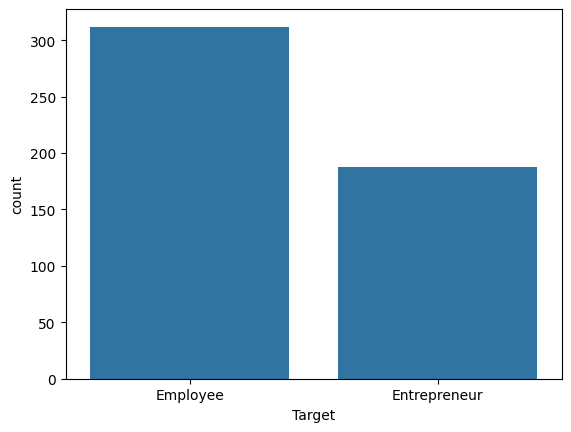

In [ ]:
sns.countplot(x=df['Target'])

## accuracy in article

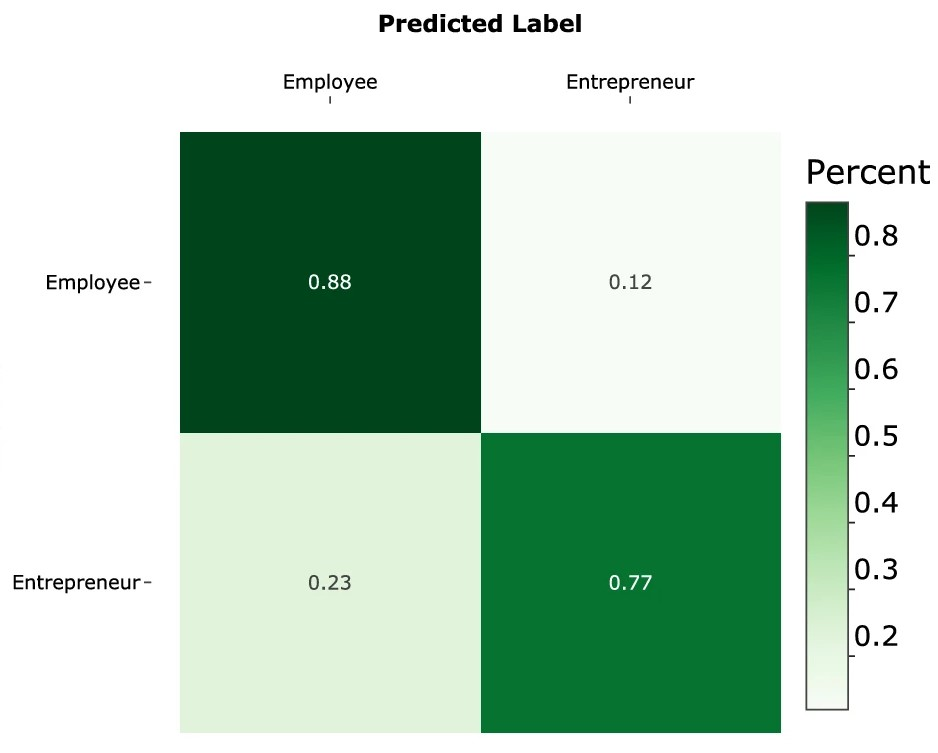

In [ ]:
specificity = round(0.88 / (0.88 + 0.12), 4)
ppv = round(0.77 / (0.77 + 0.12), 4)

print("specificity in article:", specificity)
print("ppv in article:", ppv)

specificity in article: 0.88
ppv in article: 0.8652


## first model

In [ ]:
input = Input(shape=(30,))

dense_1 = Dense(64, activation='selu')(input)
dense_2 = Dense(128, activation='selu')(dense_1)
dense_3 = Dense(256, activation='selu')(dense_2)
dense_4 = Dense(512, activation='selu')(dense_3)
dense_5 = Dense(256, activation='selu')(dense_4)
dense_6 = Dense(128, activation='selu')(dense_5)
dense_7 = Dense(64, activation='selu')(dense_6)

output = Dense(1, activation='sigmoid')(dense_7)

model = Model(inputs=input, outputs=output)

print(model.summary())

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_56 (Dense)                     │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_57 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_58 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_59 (Dense)                     │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_60 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_61 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_62 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_63 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 347,457 (1.33 MB)

 Trainable params: 347,457 (1.33 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
adam = Adam()
bce = BinaryCrossentropy()

model.compile(optimizer=adam, loss=bce, metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.5135 - loss: 0.6835 - val_accuracy: 0.6267 - val_loss: 0.6121
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6866 - loss: 0.5970 - val_accuracy: 0.7400 - val_loss: 0.5065
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7064 - loss: 0.5536 - val_accuracy: 0.7933 - val_loss: 0.4622
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7596 - loss: 0.4895 - val_accuracy: 0.7533 - val_loss: 0.5000
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7844 - loss: 0.4527 - val_accuracy: 0.7400 - val_loss: 0.5288
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8161 - loss: 0.4087 - val_accuracy: 0.8400 - val_loss: 0.4166
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8505 - loss: 0.3697 - val_accuracy: 0.8400 - val_loss: 0.3840
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8537 - loss: 0.3527 - val_accuracy: 0.8133 - v

In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

CM = confusion_matrix(y_test,y_pred)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

specificity = round(TN / (TN+FP),4 )
ppv = round(TP / (TP+FP),4 )

print ("Accuracy score: {0}".format(accuracy))
print ("F1 score: {0}".format(f1))
print ("Specificity: {0}".format(specificity))
print ("Positive Predictive Value: {0}".format(ppv))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Accuracy score: 0.8
F1 score: 0.8039819004524887
Specificity: 0.7292
Positive Predictive Value: 0.6579


In [ ]:
# Figure 1A
data = (CM/CM.sum(axis = 1)).tolist()
fig = px.imshow(data,
                labels=dict(x="<b>Predicted Label</b>", y="<b>True Label</b>", color="Percent", fontsize = 14),
                x=['Employee', 'Entrepreneur'],
                y=['Employee', 'Entrepreneur'],
                color_continuous_scale = px.colors.sequential.Greens,
                template = 'simple_white',
                text_auto='.2f')
fig.update_xaxes(side="top")

fig.update_coloraxes(colorbar_thickness = 30,
                     colorbar_tickfont = dict(size = 20),
                     colorbar_len = 0.6,
                     colorbar_ticklabelposition = 'outside top')

fig.update_layout(margin = dict(t=200,r=200,b=200,l=200),
    xaxis = dict(linecolor = 'white'),
    yaxis = dict(linecolor = 'white'),
    showlegend = False,
    width = 700, height = 700,
    autosize = False )

fig.update_layout(
    font=dict(
        size=14,  # Set the font size here
    )
)

fig.update_layout(
    margin=dict(r=0, b=0, t = 0, l=0,pad=20)
)

fig.show()

### PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

l2_reg = 1e-4
dropout_rate = 0.3

# Standardize the dataset
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

for n_components in range(1, 30+1):
    print(f"Training model with PCA n_components={n_components}")

    # Apply PCA
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Define the model
    input = Input(shape=(n_components,))

    dense_1 = Dense(256, activation='selu', kernel_regularizer=l2(l2_reg))(input)
    dense_1 = Dropout(dropout_rate)(dense_1)

    dense_2 = Dense(512, activation='selu', kernel_regularizer=l2(l2_reg))(dense_1)
    dense_2 = Dropout(dropout_rate)(dense_2)

    dense_3 = Dense(1024, activation='selu', kernel_regularizer=l2(l2_reg))(dense_2)
    dense_3 = Dropout(dropout_rate)(dense_3)

    dense_4 = Dense(2048, activation='selu', kernel_regularizer=l2(l2_reg))(dense_3)
    dense_4 = Dropout(dropout_rate)(dense_4)

    dense_5 = Dense(1024, activation='selu', kernel_regularizer=l2(l2_reg))(dense_4)
    dense_5 = Dropout(dropout_rate)(dense_5)

    dense_6 = Dense(512, activation='selu', kernel_regularizer=l2(l2_reg))(dense_5)
    dense_6 = Dropout(dropout_rate)(dense_6)

    dense_7 = Dense(256, activation='selu', kernel_regularizer=l2(l2_reg))(dense_6)
    dense_7 = Dropout(dropout_rate)(dense_7)

    dense_8 = Dense(128, activation='selu', kernel_regularizer=l2(l2_reg))(dense_7)
    dense_8 = Dropout(dropout_rate)(dense_8)

    dense_9 = Dense(64, activation='selu', kernel_regularizer=l2(l2_reg))(dense_8)
    dense_9 = Dropout(dropout_rate)(dense_9)

    output = Dense(1, activation='sigmoid')(dense_9)

    model = Model(inputs=input, outputs=output)

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train_pca, y_train, validation_data=(X_test_pca, y_test), epochs=100, batch_size=32, verbose=1)

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test_pca, y_test, verbose=0)
    print(f"PCA n_components={n_components} -> Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}\n")


Streaming output truncated to the last 5000 lines.
Epoch 38/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7110 - loss: 1.1069 - val_accuracy: 0.7733 - val_loss: 1.0643
Epoch 39/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7206 - loss: 1.1076 - val_accuracy: 0.8000 - val_loss: 1.0517
Epoch 40/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6980 - loss: 1.1484 - val_accuracy: 0.7800 - val_loss: 1.0305
Epoch 41/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7653 - loss: 1.0498 - val_accuracy: 0.8000 - val_loss: 1.0832
Epoch 42/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6733 - loss: 1.1688 - val_accuracy: 0.7600 - val_loss: 1.0821
Epoch 43/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7152 - loss: 1.0464 - val_accuracy: 0.7867 - val_loss: 1.0469
Epoch 44/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7589 - loss: 1.0150 - val_accuracy: 0.7800 - val_loss: 1.0614
Epoch 45/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 

## final model

In [ ]:
l2_reg = 1e-4
dropout_rate = 0.3

pca = PCA(n_components=20)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

input = Input(shape=(20,))

dense_1 = Dense(256, activation='selu', kernel_regularizer=l2(l2_reg))(input)
dense_1 = Dropout(dropout_rate)(dense_1)

dense_2 = Dense(512, activation='selu', kernel_regularizer=l2(l2_reg))(dense_1)
dense_2 = Dropout(dropout_rate)(dense_2)

dense_3 = Dense(1024, activation='selu', kernel_regularizer=l2(l2_reg))(dense_2)
dense_3 = Dropout(dropout_rate)(dense_3)

dense_4 = Dense(2048, activation='selu', kernel_regularizer=l2(l2_reg))(dense_3)
dense_4 = Dropout(dropout_rate)(dense_4)

dense_5 = Dense(1024, activation='selu', kernel_regularizer=l2(l2_reg))(dense_4)
dense_5 = Dropout(dropout_rate)(dense_5)

dense_6 = Dense(512, activation='selu', kernel_regularizer=l2(l2_reg))(dense_5)
dense_6 = Dropout(dropout_rate)(dense_6)

dense_7 = Dense(256, activation='selu', kernel_regularizer=l2(l2_reg))(dense_6)
dense_7 = Dropout(dropout_rate)(dense_7)

dense_8 = Dense(128, activation='selu', kernel_regularizer=l2(l2_reg))(dense_7)
dense_8 = Dropout(dropout_rate)(dense_8)

dense_9 = Dense(64, activation='selu', kernel_regularizer=l2(l2_reg))(dense_8)
dense_9 = Dropout(dropout_rate)(dense_9)

output = Dense(1, activation='sigmoid')(dense_9)

model = Model(inputs=input, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Callback to save the best model based on validation accuracy
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

# Train the model
model.fit(X_train_pca, y_train, validation_data=(X_test_pca, y_test), epochs=100, batch_size=32, verbose=1, callbacks=[checkpoint])

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - accuracy: 0.6095 - loss: 1.6494
Epoch 1: val_accuracy improved from -inf to 0.74000, saving model to best_model.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 358ms/step - accuracy: 0.6123 - loss: 1.6553 - val_accuracy: 0.7400 - val_loss: 1.1619
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - accuracy: 0.7096 - loss: 1.4888
Epoch 2: val_accuracy improved from 0.74000 to 0.82000, saving model to best_model.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 241ms/step - accuracy: 0.7086 - loss: 1.5022 - val_accuracy: 0.8200 - val_loss: 1.0862
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - accuracy: 0.7613 - loss: 1.3769
Epoch 3: val_accuracy improved from 0.82000 to 0.84000, saving model to best_model.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 210ms/step - accuracy: 0.7611 - loss: 1.3812 - val_accuracy: 0.8400 - val_loss: 1.1543
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.7341 - loss: 1.5039
Epoch 4: val_accuracy did not improve

In [ ]:
# Load the best model and evaluate
from tensorflow.keras.models import load_model
best_model = load_model('best_model.keras')
loss, accuracy = best_model.evaluate(X_test_pca, y_test, verbose=0)
print(f"Best Model Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

Best Model Test Loss: 1.0666, Test Accuracy: 0.8867


In [ ]:
y_pred = best_model.predict(X_test_pca)
y_pred = (y_pred > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

CM = confusion_matrix(y_test,y_pred)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

specificity = round(TN / (TN+FP),4 )
ppv = round(TP / (TP+FP),4 )

print ("Accuracy score: {0}".format(accuracy))
print ("F1 score: {0}".format(f1))
print ("Specificity: {0}".format(specificity))
print ("Positive Predictive Value: {0}".format(ppv))

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step
Accuracy score: 0.8866666666666667
F1 score: 0.886889860223834
Specificity: 0.9062
Positive Predictive Value: 0.8364


In [ ]:
# Figure 1A
data = (CM/CM.sum(axis = 1)).tolist()
fig = px.imshow(data,
                labels=dict(x="<b>Predicted Label</b>", y="<b>True Label</b>", color="Percent", fontsize = 14),
                x=['Employee', 'Entrepreneur'],
                y=['Employee', 'Entrepreneur'],
                color_continuous_scale = px.colors.sequential.Greens,
                template = 'simple_white',
                text_auto='.2f')
fig.update_xaxes(side="top")

fig.update_coloraxes(colorbar_thickness = 30,
                     colorbar_tickfont = dict(size = 20),
                     colorbar_len = 0.6,
                     colorbar_ticklabelposition = 'outside top')

fig.update_layout(margin = dict(t=200,r=200,b=200,l=200),
    xaxis = dict(linecolor = 'white'),
    yaxis = dict(linecolor = 'white'),
    showlegend = False,
    width = 700, height = 700,
    autosize = False )

fig.update_layout(
    font=dict(
        size=14,  # Set the font size here
    )
)

fig.update_layout(
    margin=dict(r=0, b=0, t = 0, l=0,pad=20)
)

fig.show()